Parameters for Parabola 1 (x between 520 and 540):
a = -9.738592257381575e-05, b = 0.1032045647423005, c = -27.325271570782427

Parameters for Parabola 2 (x between 550 and 580):
a = -4.628835016962769e-05, b = 0.0524199845109208, c = -14.816258573329321

Maximum x values for each parabola:
x_max for Parabola 1: 529.8741440995971
x_max for Parabola 2: 566.2330188786509


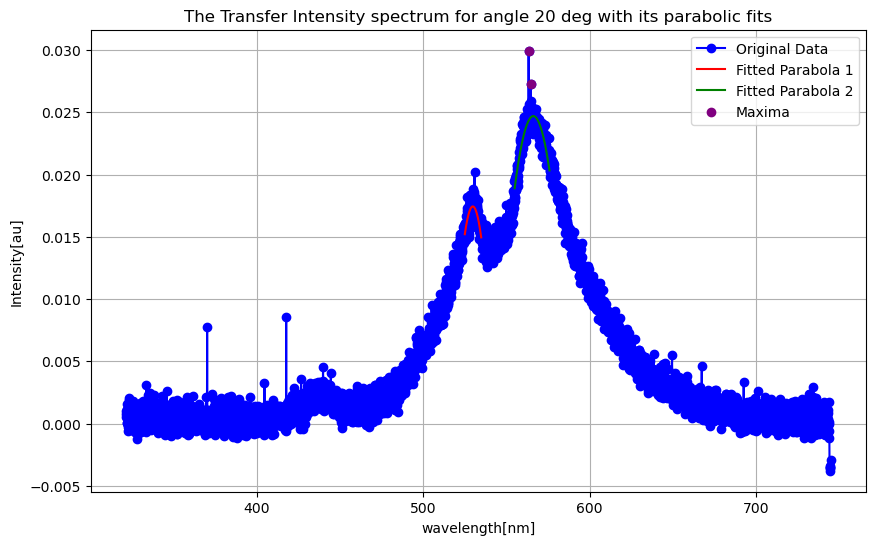

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a quadratic function
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Load the data from the .ods file
file_path = r"C:\Users\oronb\Downloads\int=200 degree=20.ods"  # Replace with your file path
sheet_name = 0  # Replace with the sheet name or index if needed
data = pd.read_excel(file_path, sheet_name=sheet_name, engine='odf')

# Assume the .ods file has two columns: 'X [nm (air)]' and 'Y [Intensity]'
x_data = data['X [nm (air)]'].values
y_data = data['Y [Intensity]'].values

# Find the indices of the two maximum points
peak_indices = np.argsort(y_data)[-2:]  # Indices of the two highest points
peak_indices = np.sort(peak_indices)  # Ensure peaks are in ascending x order

# Split the data based on x values
region1_x = x_data[(x_data > 525) & (x_data < 535)]  # x-values between 520 and 540
region1_y = y_data[(x_data > 525) & (x_data < 535)]  # Corresponding y-values

region2_x = x_data[(x_data > 555) & (x_data < 576)]  # x-values between 550 and 580
region2_y = y_data[(x_data > 555) & (x_data < 576)]  # Corresponding y-values

# Fit a quadratic curve to each region
params1, _ = curve_fit(quadratic, region1_x, region1_y)
params2, _ = curve_fit(quadratic, region2_x, region2_y)

# Print the parameters for each parabola
print("Parameters for Parabola 1 (x between 520 and 540):")
print(f"a = {params1[0]}, b = {params1[1]}, c = {params1[2]}")
print("\nParameters for Parabola 2 (x between 550 and 580):")
print(f"a = {params2[0]}, b = {params2[1]}, c = {params2[2]}")

# Calculate the x_max (vertex) for each parabola
x_max1 = -params1[1] / (2 * params1[0])  # Vertex of the first parabola
x_max2 = -params2[1] / (2 * params2[0])  # Vertex of the second parabola

print("\nMaximum x values for each parabola:")
print(f"x_max for Parabola 1: {x_max1}")
print(f"x_max for Parabola 2: {x_max2}")

# Generate smooth curves for plotting the fitted parabolas
x_fit1 = np.linspace(region1_x.min(), region1_x.max(), 500)
y_fit1 = quadratic(x_fit1, *params1)

x_fit2 = np.linspace(region2_x.min(), region2_x.max(), 500)
y_fit2 = quadratic(x_fit2, *params2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'bo-', label="Original Data")
plt.plot(x_fit1, y_fit1, 'r-', label="Fitted Parabola 1")
plt.plot(x_fit2, y_fit2, 'g-', label="Fitted Parabola 2")
plt.scatter(x_data[peak_indices], y_data[peak_indices], color='purple', zorder=5, label="Maxima")
plt.xlabel("wavelength[nm]")
plt.ylabel("Intensity[au]")
plt.title("The Transfer Intensity spectrum for angle 20 deg with its parabolic fits")
plt.legend()
plt.grid()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Define a quadratic function
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Initialize lists to store results
results = []

# Loop through files for angles -20 to 20 with 2° spacing
angles = range(-20, 21, 2)
for angle in angles:
    file_path = fr"C:\Users\oronb\Downloads\int=200 degree={angle}.ods"
    data = pd.read_excel(file_path, sheet_name=0, engine='odf')

    # Assume the .ods file has two columns: 'X [nm (air)]' and 'Y [Intensity]'
    x_data = data['X [nm (air)]'].values
    y_data = data['Y [Intensity]'].values

    # Search for the first peak in the range 520 ≤ x ≤ 540
    mask1 = (x_data >= 525) & (x_data <= 535)
    peak_indices1, _ = find_peaks(y_data[mask1])
    x_peaks1 = x_data[mask1][peak_indices1]
    y_peaks1 = y_data[mask1][peak_indices1]
    x_max1 = x_peaks1[np.argmax(y_peaks1)] if len(x_peaks1) > 0 else np.nan  # Choose the highest peak

    # Search for the second peak in the range 560 ≤ x ≤ 580
    mask2 = (x_data >= 555) & (x_data <= 576)
    peak_indices2, _ = find_peaks(y_data[mask2])
    x_peaks2 = x_data[mask2][peak_indices2]
    y_peaks2 = y_data[mask2][peak_indices2]
    x_max2 = x_peaks2[np.argmax(y_peaks2)] if len(x_peaks2) > 0 else np.nan  # Choose the highest peak

    # Fit quadratic curves around the two peaks
    window_size = 10  # Number of points around the peak for fitting
    region1_mask = (x_data >= x_max1 - window_size) & (x_data <= x_max1 + window_size)
    region2_mask = (x_data >= x_max2 - window_size) & (x_data <= x_max2 + window_size)

    region1_x, region1_y = x_data[region1_mask], y_data[region1_mask]
    region2_x, region2_y = x_data[region2_mask], y_data[region2_mask]

    params1, _ = curve_fit(quadratic, region1_x, region1_y)
    params2, _ = curve_fit(quadratic, region2_x, region2_y)

    # Calculate x_max from the quadratic fit
    a1, b1, c1 = params1
    a2, b2, c2 = params2
    x_max1_fit = -b1 / (2 * a1)
    x_max2_fit = -b2 / (2 * a2)

    # Calculate errors as differences between methods
    error1 = abs(x_max1_fit - x_max1) if not np.isnan(x_max1) else np.nan
    error2 = abs(x_max2_fit - x_max2) if not np.isnan(x_max2) else np.nan

    # Append results to the list
    results.append({
        'Angle': angle,
        'x_max1_peaks': x_max1,
        'x_max2_peaks': x_max2,
        'x_max1_fit': x_max1_fit,
        'x_max2_fit': x_max2_fit,
        'Error1': error1,
        'Error2': error2
    })

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel(r"C:\Users\oronb\Downloads\x_max_results1.xlsx", index=False)

# Display results
print(results_df)


    Angle  x_max1_peaks  x_max2_peaks  x_max1_fit  x_max2_fit    Error1  \
0     -20    530.941833     563.41449  531.997595  567.937110  1.055762   
1     -18    530.941833     563.41449  532.435899  568.423840  1.494066   
2     -16    530.941833     563.41449  532.830052  568.930166  1.888218   
3     -14    531.762329     563.41449  533.514132  569.412531  1.751803   
4     -12    530.941833     563.41449  533.259333  569.660292  2.317499   
5     -10    530.941833     563.41449  533.508604  570.287932  2.566771   
6      -8    530.941833     563.41449  533.644130  570.821101  2.702296   
7      -6    530.941833     563.41449  533.378867  570.945565  2.437033   
8      -4    530.941833     563.41449  531.395193  565.901102  0.453360   
9      -2    530.941833     563.41449  533.309196  570.520175  2.367362   
10      0    530.941833     563.41449  533.711576  570.220781  2.769742   
11      2    530.941833     563.41449  533.561272  570.084854  2.619439   
12      4    530.941833  